In [31]:
% matplotlib nbagg 
#este comando se considera como una línea mágina, y sirve para la construcción de gráficas interactivas
import math
import numpy as np #librería numérica
import matplotlib.pyplot as plt #librería para graficar
import matplotlib.animation as animation #librería para animaciones
plt.style.use('ggplot') #este es un estilo de gráfico diferente al usual

Traceback (most recent call last):
  File "c:\users\alexi\envs\metodos\lib\site-packages\matplotlib\cbook\__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "c:\users\alexi\envs\metodos\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "c:\users\alexi\envs\metodos\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [32]:
def fun_x(x, y):
    return -4*(math.pi**2)*x/((x**2+y**2)**(3/2))

def fun_y(x, y):
    return -4*(math.pi**2)*y/((x**2+y**2)**(3/2))

In [33]:
#inicializamos todas las variables
dim  = 2    # dimensiones del sistema (x,y)
conteo_t = 10000 # number de pasos
Vx    = 1.0 # velocidad de la partícula
Vy = 1.0
tiempo = np.zeros(conteo_t) # vector de tiempo

In [34]:
def iniciar(): # función para inicializar la animación
    particula.set_data([], []) #definimos un elemento de animación en blanco
    linea.set_data([], []) #definimos un elemento de animación en blanco
    titulo.set_text(r'')
    return particula, linea, titulo #retornamos la inicialización

In [35]:
def animar_runge_kutta_4(i): # definimos la animación por el método de euler
    global X,V,Y,F,Vx,Vy,tiempo,h #variables globales
    k1=h*Vx
    l1=h*fun_x(X, Y)
    q1=h*Vy
    m1=h*fun_y(X, Y)

    k2=h*(Vx+l1/2)
    l2=h*fun_x(X+k1/2, Y+q1/2)
    q2=h*(Vy+m1/2)
    m2=h*fun_y(X+k1/2, Y+q1/2)

    k3=h*(Vx+l2/2)
    l3=h*fun_x(X+k2/2, Y+q2/2)
    q3=h*(Vy+m2/2)
    m3=h*fun_y(X+k2/2, Y+q2/2)

    k4=h*(Vx+l3)
    l4=h*fun_x(X+k3, Y+q3)
    q4=h*(Vy+m3)
    m4=h*fun_y(X+k3, Y+q3)
    
    X+=(k1+2*k2+2*k3+k4)/6
    Vx+=(l1+2*l2+2*l3+l4)/6
    Y+=(q1+2*q2+2*q3+q4)/6
    Vy+=(m1+2*m2+2*m3+m4)/6
    
    tiempo[i]=i*h
    particula.set_data(X, Y)  # creamos una partícula en la posición actual
    linea.set_data(X, Y) # Creamos la línea con la última pos
    titulo.set_text(r"$t = {0:.2f}$".format(i*h))
    return particula,linea,titulo

<IPython.core.display.Javascript object>


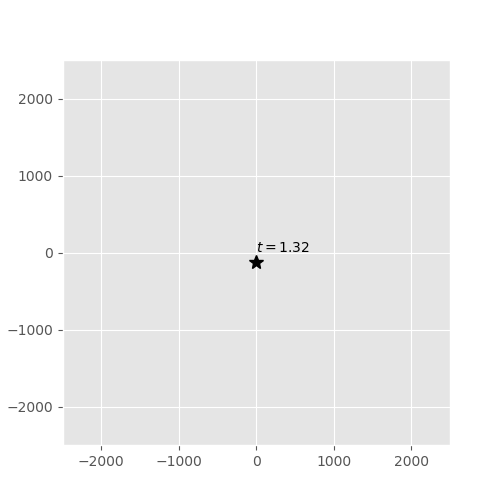

In [36]:
# establecemos las condiciones iniciales
X, Y = 1.5, 1. # Rx(0), Ry(0)
Vx, Vy = 1., 1. # Vx(0), Vy(0)
area  = 5000# tamaño para el área de dibujo
h = 0.001 # paso
m = 1 # masa
k = 1 # constante
w0 = np.sqrt(k/m)
fig, ax = plt.subplots(figsize=(5,5)) # instanciamos la figura
ax = plt.axes(xlim=(-area/2,area/2),ylim=(-area/2,area/2)) # dibujamos el rango
particula, = ax.plot([],[],'k*', ms=10) # plot para la partícula

linea,=ax.plot([],[],lw=1) # plot para la trayectoria
titulo=ax.text(0.5,1.05,r'')
anim=animation.FuncAnimation(fig,animar_runge_kutta_4,init_func=iniciar,
     frames=conteo_t,interval=5,blit=True,repeat=False) # dibujamos la animacion usando el metodo seleccionado
# anim.save('movie.mp4',fps=20,dpi=400)